# Bibliotecas Pandas

## Modelos series

In [3]:
# Uma Series é um como um vetor de dados (unidimensional), capaz de armazenar diferentes tipos de dados. 

import pandas as pd

s1 = pd.Series(data=5)  # Cria uma Series com o valor 5
s2 = pd.Series('Howard Ian Peter Jonah Kellie'.split())  # Cria uma Series com uma lista de nomes

print("s1:")
print(s1)

print("\ns2:")
print(s2)

s1:
0    5
dtype: int64

s2:
0    Howard
1       Ian
2     Peter
3     Jonah
4    Kellie
dtype: object


## Modelo Dataframe

In [4]:
# Um DataFrame é um conjunto de Series, ou, como a documentação apresenta, um contêiner para Series. 
df1 = pd.DataFrame(data='Howard Ian Peter Jonah Kellie'.split(), columns=['nome'])  # Cria um DataFrame de uma coluna a partir de uma lista

df1

,nome
0,Howard
1,Ian
2,Peter
3,Jonah
4,Kellie


In [5]:
lista_nomes = 'Howard Ian Peter Jonah Kellie'.split()
lista_cpfs = '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split()
lista_emails = 'risus.varius@dictumPhasellusin.ca Nunc@vulputate.ca fames.ac.turpis@cursusa.org non@felisullamcorper.org eget.dictum.placerat@necluctus.co.uk'.split()
lista_idades = [32, 22, 25, 29, 38]

# Cria uma lista de tuplas
dados = list(zip(lista_nomes, lista_cpfs, lista_idades, lista_emails))

# Cria um DataFrame a partir de uma lista de tuplas
df2 = pd.DataFrame(dados, columns=['nome', 'cpfs', 'idade', 'email'])

df2

,nome,cpfs,idade,email
0,Howard,111.111.111-11,32,risus.varius@dictumPhasellusin.ca
1,Ian,222.222.222-22,22,Nunc@vulputate.ca
2,Peter,333.333.333-33,25,fames.ac.turpis@cursusa.org
3,Jonah,444.444.444-44,29,non@felisullamcorper.org
4,Kellie,555.555.555-55,38,eget.dictum.placerat@necluctus.co.uk


In [43]:
import pandas as pd

listaSurvived = [0, 1, 1, 1, 0]
listaPclass = [3, 1, 3, 1, 3]
listaNome = 'Mr. Owen Harris Braund|Mrs. John Bradley (Florence Briggs Thayer Cumings)|Miss. Laina Heikkinen|Mrs Jacques Heath (Lily May Peel) Futrelle|Mr. William Henry Allen'.split('|')
listaSex = 'male|female|female|female|male'.split('|')
listaAge = [22, 38, 26, 35, 35]
listaSpousesAboard = [1, 1, 0 , 1, 0]
listaChildrenAboard = [0, 0, 0, 0 ,0]
listaFare = [7.2500, 71.2833, 7.9250, 53.10000, 8.0500]

tabela = list(zip(listaSurvived, listaPclass, listaNome, listaSex, listaAge, listaSpousesAboard, listaChildrenAboard, listaFare))

df3 = pd.DataFrame(tabela, columns=['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'])

df3

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer Cumi...,female,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
3,1,1,Mrs Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35,0,0,8.0500


In [24]:
# Para selecionar uma coluna usa-se a sintaxe: meu_df['coluna']

df3['Age']

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [26]:
# Para selecionar mais de uma coluna é preciso passar uma lista de colunas: meu_df[['coluna1', 'coluna2', 'coluna3']]
df3[['Name','Age', 'Fare']]

,Name,Age,Fare
0,Mr. Owen Harris Braund,22,7.2500
1,Mrs. John Bradley (Florence Briggs Thayer Cum...,38,71.2833
2,Miss. Laina Heikkinen,26,7.9250
3,Mrs Jacques Heath (Lily May Peel) Futrelle,35,53.1000
4,Mr. William Henry Allen,35,8.0500


In [50]:
# Filtrar somente os homens em um novo DataFrame.
filtro_homem = df3['Sex'] == 'male'
df3_homens = df3.loc[filtro_homem]  

df3_homens

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7.25
4,0,3,Mr. William Henry Allen,male,35,0,0,8.05


In [51]:
# um novo DataFrame somente com os passageiros que sobreviveram
filtro_sobreviventes = df3['Survived'] == 1
df3_sobreviventes = df3.loc[filtro_sobreviventes]

df3_sobreviventes

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer Cumi...,female,38,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
3,1,1,Mrs Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000


In [54]:
# um novo DataFrame contendo todos os homens que sobreviveram.
filtro_sobreviventes = df3['Survived'] == 1
filtro_homem = df3['Sex'] == 'male'

df_titanic_homens_sobreviventes = df3.loc[(filtro_sobreviventes) &(filtro_homem)]

df_titanic_homens_sobreviventes

# pelo resultado não há sobreviventes homens

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


## Biblioteca matplotlib

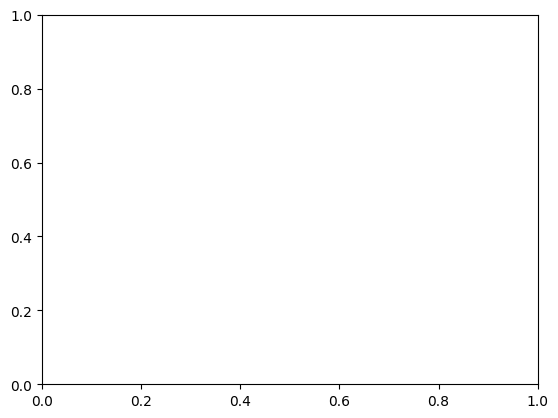

In [58]:
# biblioteca ncessaria e instalar o modulo pip install matplotlib

import matplotlib.pyplot as plt

# Para criar uma figura com um eixo, de forma explícita, usamos: 

fig, ax = plt.subplots(1, 1)


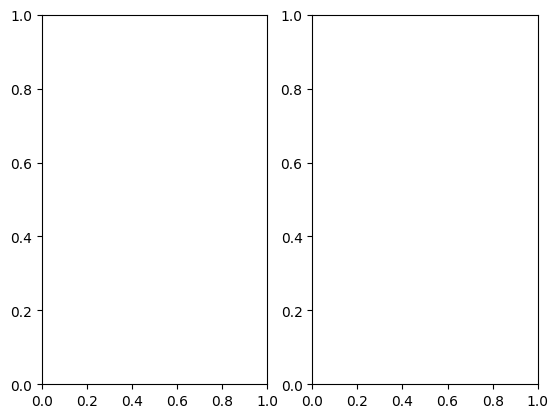

In [65]:
# Para criar uma figura com dois eixos (1 linha, 2 colunas), de forma explícita, usamos:

fig, ax = plt.subplots(1, 2)


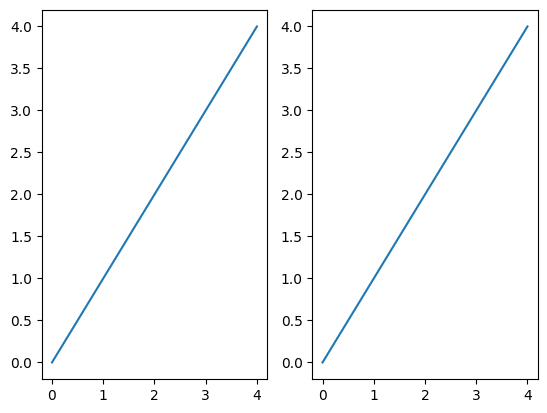

In [76]:
import matplotlib.pyplot as plt

# Criando uma figura com dois eixos (1 linha, 2 colunas)
fig, ax = plt.subplots(1, 2)

# Definindo os dados (substitua range(10) pelos seus dados)
dados = range(5)

# Plotando os dados no primeiro eixo
ax[0].plot(dados)

# Plotando os mesmos dados no segundo eixo (apenas como exemplo)
ax[1].plot(dados)


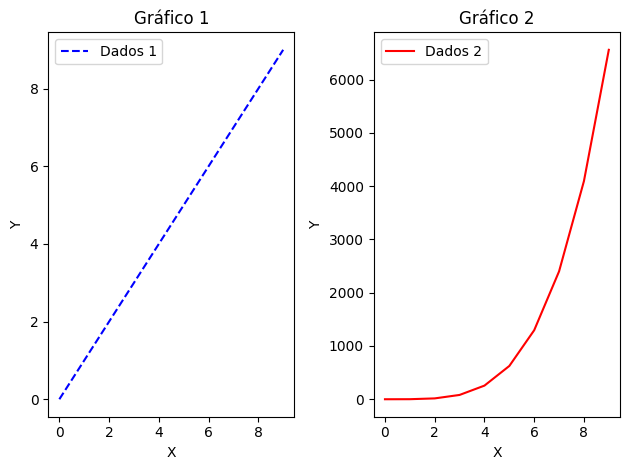

In [81]:
import matplotlib.pyplot as plt

# Criando uma figura com dois eixos (1 linha, 2 colunas)
fig, ax = plt.subplots(1, 2)

# Definindo os dados (substitua range(10) pelos seus dados)
dados = range(10)
dados2 = [x**4 for x in dados]  # Definindo os dados 2

# Plotando os dados no primeiro eixo
ax[0].plot(dados, color='blue', linestyle='--', label='Dados 1')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Gráfico 1')
ax[0].legend()

# Plotando os dados no segundo eixo
ax[1].plot(dados2, color='red', linestyle='-', label='Dados 2')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Gráfico 2')
ax[1].legend()

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()